<a href="https://colab.research.google.com/github/Evianitary18/Programming-With-Python/blob/main/Evianita_Rifka_Yulistia_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STUDY CASE

My Future Platform is an edutech startup that provides additional learning access services through the LMS feature where users can register for online learning classes to support work skills and portfolios.

With the large number of users the platform has, of course the company has quite a large amount of data. However, the management of the data held has not been maximized properly as a basis for decision making.

Therefore, stakeholders need a medium such as a dashboard that displays up-to-date information to see metrics that are relevant to business needs such as number of users, number of classes, class completion rate, etc.

Not only dashboards, stakeholders also have business questions that they hope can be answered with the current data availability. It is hoped that the answers provided will help stakeholders in making data-based decisions in the future.

Therefore, stakeholders need a medium such as a dashboard that displays up-to-date information to see metrics that are relevant to business needs such as number of users, number of classes, class completion rate, etc.

Not only dashboards, stakeholders also have business questions that they hope can be answered with the current availability of data. It is hoped that the answers provided will help stakeholders in making data-based decisions in the future.

***

**1. What fields of study are most in demand when >= April 2020 and after the pandemic ends >= January 1 2023**

**2. What are the monthly trends in class enrollment for each field of study during and after the pandemic?**

**3. What percentage of users have more than 1 class of interest?**

**4. If stakeholders want to provide class vouchers, to loyal users of the platform, provide a list of users who have the potential to have a high voucher redemption rate, seen from the number of classes attended and the last time the user accessed the class (updated _at)?**

# DATASET

Link Dataset:
https://docs.google.com/spreadsheets/d/1k7A1ZQ92slepO1LzPRt1Yti7mV2nuER6/edit?usp=sharing&ouid=106206484783993710530&rtpof=true&sd=true


# DATA DESCRIPTION

**Data Structure**  
- **Data Count**: 16  
- **Data Types**: Integer, Text, Date, Timestamp, Numeric, Varchar  
- **Main Focus**: User information, class information, learning activities, and evaluation metrics.  

**Data Identification**  
- **id_registration**: Primary key of the dataset  
- **id_user and user_name**: Unique user identifiers (masked).  
- **birth_date & gender**: User demographic data.  
- **id_class & class_name**: Unique identifiers and names of classes taken by users.  
- **field_of_study**: Category or type of study field undertaken by users.  
- **registration_date**: Timestamp of user registration for a class.  
- **completion_date**: Timestamp indicating class completion.  
- **last_access_date**: User's last activity in the class.  

**Learning Activities and Evaluation**  
- **activities_completed & total_activities**: User performance in completing learning activities in the class.  
- **final_score**: Final score obtained from the class.  
- **class_rating & class_review**: User evaluation of class quality.  

**Data Quality and Complexity**  

**Data Completeness**  
- Timestamp information allows trend exploration based on time dimensions.  

**Availability of Numerical Data**  
- Columns like `final_score`, `activities_completed`, and `class_rating` enable quantitative evaluation of user performance.  

**Textual Data**  

**Correlation with Most Preferred Study Fields**  
- Data in the `field_of_study` column can be combined with `registration_date` to observe class registration trends based on time and category.  

**Monthly Class Registration Trends**  
- The `registration_date` column can be processed for seasonal trend analysis.  

**User Loyalty**  
- Data on `id_user` and `id_class` allows the identification of users taking multiple classes.  

**Potential for Voucher Distribution**  
- Combining data from `id_user`, `last_access_date`, and `activities_completed` can facilitate user segmentation for loyalty programs.  

**Recommended Analyses**  
1. **Frequency Analysis**: On categorical columns like `field_of_study`.  
2. **Time Trends**: Time-based analysis for `registration_date` and `last_access_date`.  
3. **User Total Analysis**: Based on the total number of classes taken.  
4. **Cluster Analysis**: User segmentation based on the total classes taken and last access time.  

# DATA PREPARATION

1. Library import is performed before data manipulation and analysis to manage data in the form of a data frame.  
2. Data is read from an XLSX file and the top rows of the output are displayed.

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# code to remove the warning message when running the code below
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Data
df_project = pd.read_excel('Project4_1A.xlsx')
df_project.head()

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,Sangat baik.


# DATA EXPLORATION

1. Data exploration is carried out at an early stage with the aim of understanding the data in depth and comprehensively before further analysis is carried out.
2. In this exploration process, information on the data can also be displayed, such as the number of rows and columns of data, as well as the type of data itself.

In [5]:
#Check how many rows and columns
df_project.shape

(5430, 16)

In [6]:
# See The Data
df_project

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
0,1,80c253a2888fc16e3d7109622d3f9747,Mah****,2001-01-06,Perempuan,5d546faa0bf551fd84b9117c03f63311,Pan**************************,Pemasaran,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 13:26:01,15,25,70.0,3.0,lumayan
1,2,a96f131b42a5c14f62d0d02dd322c9c6,Put**************,1995-09-10,Laki-laki,ba042968f0362aae24d2a001d1323af7,Kel*********************************************,Pendidikan & Pelatihan,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-22 18:38:45,18,18,50.0,4.0,Sangat membantu dan mudah di pahami
2,3,d4a81886022faa38ee6a1456a4eb1e0b,JAK********,1993-05-11,Male,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa Inggris,2020-04-22 00:00:00,2023-09-18 16:15:18,2020-04-23 03:37:14,28,28,93.0,5.0,Menarik
3,4,00dfe9a7199b926b061f833264887595,Vir******************,1990-01-30,Perempuan,4bc224deb0b8d2639c9e759ff6063023,Men*******************************************,Digital & Teknologi,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-25 16:40:37,10,17,100.0,3.0,lumayan
4,5,d3c27944d155d39dc085fe5eeb81c30b,Nof***********,1990-11-01,Laki-laki,77809dae4c51c080e1156ebbacba0c33,Mud*******************************,Soft Skills,2020-04-23 00:00:00,2023-09-18 16:15:18,2020-04-24 00:31:27,52,55,100.0,5.0,Sangat baik.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,Laki-laki,fb41f1657e2c2edf6b9c86753022f6c9,Tea***********************,Pendidikan & Pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,NaT,1,26,NaN,NaN,NaN
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,Perempuan,6d89a47b116dc3fd794d001d4df394a2,Men*******************************************...,Teknologi (IT),2023-10-18 14:36:59,2023-10-23 06:12:16,NaT,7,21,0.0,NaN,NaN
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,Female,d0a261660d3b3f7b818eb1b377fe1aae,Men**********************************,Perencanaan Bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,NaT,3,25,NaN,NaN,NaN
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,Male,1bbc33c05ea4bcc59386b13dfac009b0,Cus*******************************************...,Marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,NaT,3,22,0.0,NaN,NaN


In [7]:
# check information on data
df_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_pendaftaran          5430 non-null   int64         
 1   id_pengguna             5430 non-null   object        
 2   nama_pengguna           5430 non-null   object        
 3   tanggal_lahir           5364 non-null   datetime64[ns]
 4   jenis_kelamin           5430 non-null   object        
 5   id_kelas                5430 non-null   object        
 6   nama_kelas              5430 non-null   object        
 7   bidang_studi            5430 non-null   object        
 8   tanggal_mendaftar       5430 non-null   datetime64[ns]
 9   tanggal_terakhir_akses  5430 non-null   datetime64[ns]
 10  tanggal_menyelesaikan   4912 non-null   datetime64[ns]
 11  aktivitas_selesai       5430 non-null   int64         
 12  total_aktivitas         5430 non-null   int64   

# DATA CLEANING

# Missing Value

Check whether there are any missing values ​​in the data.

In [9]:
missing_values = df_project.isnull().sum()
if missing_values.sum() == 0:
    print('No missing value\n', missing_values)
else:
    print('There are missing values\n', missing_values)

There are missing values
 id_pendaftaran              0
id_pengguna                 0
nama_pengguna               0
tanggal_lahir              66
jenis_kelamin               0
id_kelas                    0
nama_kelas                  0
bidang_studi                0
tanggal_mendaftar           0
tanggal_terakhir_akses      0
tanggal_menyelesaikan     518
aktivitas_selesai           0
total_aktivitas             0
skor_akhir                830
rating_kelas              521
review_kelas              521
dtype: int64


In [10]:
# Check the percentage of missing values
missing_percentage = (df_project.isna().sum()/df_project.shape[0])*100
missing_percentage

,0
id_pendaftaran,0.000000
id_pengguna,0.000000
nama_pengguna,0.000000
tanggal_lahir,1.215470
jenis_kelamin,0.000000
id_kelas,0.000000
nama_kelas,0.000000
bidang_studi,0.000000
tanggal_mendaftar,0.000000
tanggal_terakhir_akses,0.000000




> **View the distribution of data that has missing values**



<Axes: xlabel='tanggal_lahir', ylabel='Count'>

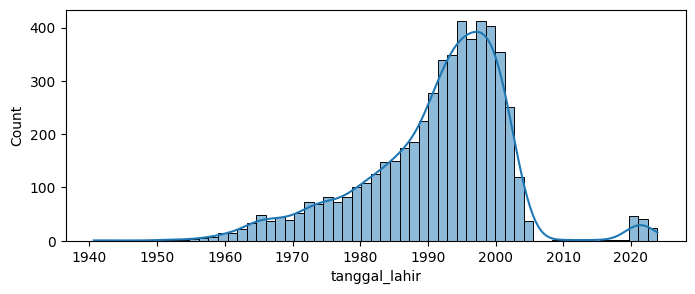

In [11]:
# see the distribution of birth dates
plt.figure(figsize=(8, 3))
sns.histplot(df_project['tanggal_lahir'], kde=True)

<Axes: xlabel='tanggal_menyelesaikan', ylabel='Count'>

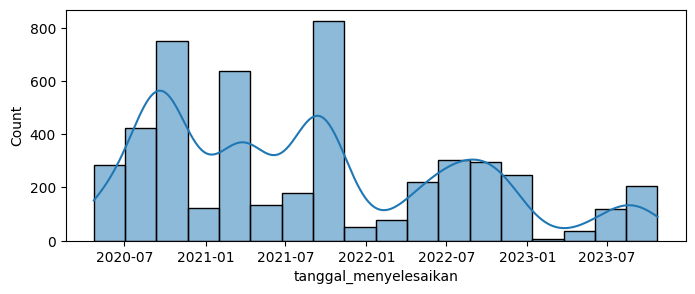

In [12]:
# See the distribution of tanggal_menyelesaikan
plt.figure(figsize=(8, 3))
sns.histplot(df_project['tanggal_menyelesaikan'], kde = True)

<Axes: xlabel='skor_akhir', ylabel='Count'>

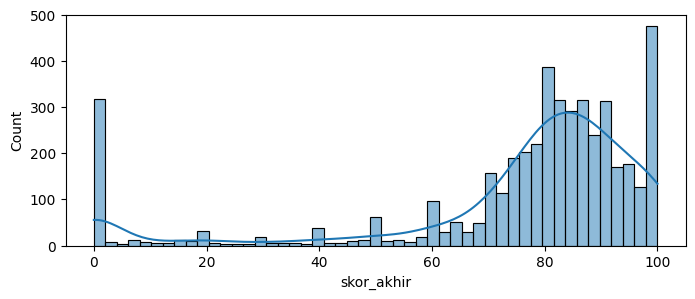

In [13]:
# See the distribution of skor_akhir
plt.figure(figsize=(8, 3))
sns.histplot(df_project['skor_akhir'], kde = True)

<Axes: xlabel='rating_kelas', ylabel='Count'>

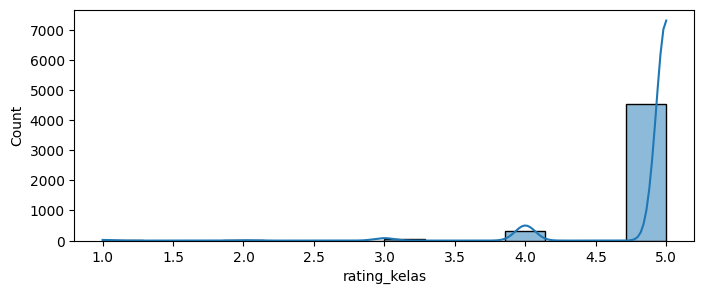

In [14]:
# See the distribution of rating_kelas
plt.figure(figsize=(8, 3))
sns.histplot(df_project['rating_kelas'], kde = True)

<Axes: xlabel='review_kelas', ylabel='Count'>

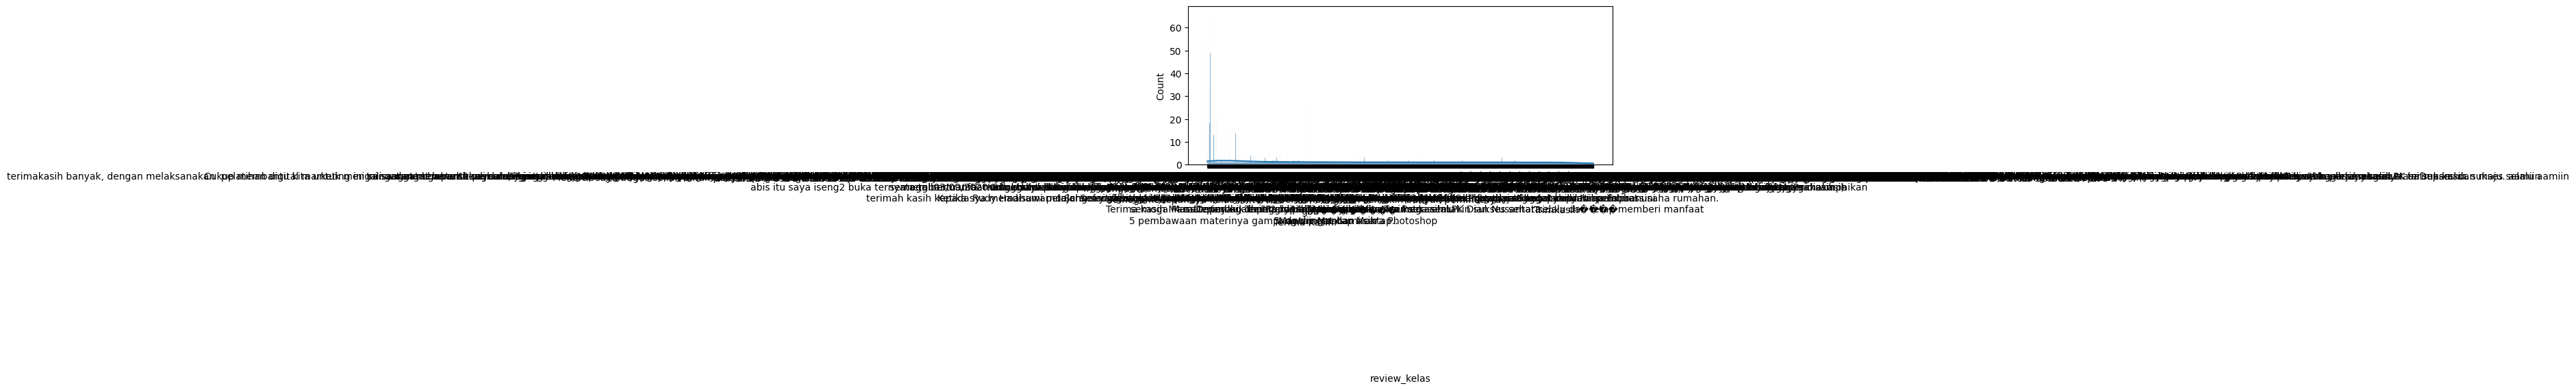

In [15]:
# See the distribution of review_kelas
plt.figure(figsize=(8, 3))
sns.histplot(df_project['review_kelas'], kde = True)



> **Handling missing values**



- Remove missing date of birth
- Leave missing the completion date
- Missing imputation on final scores that contain >=1 completed activity
- Replace class review to string
- Fill in the missing values ​​in the class rating with a value of 0

The reasons for treatment are listed below.

**Tanggal Lahir**

Missing values ​​on date of birth are deleted because they will not affect data analysis. In addition, because the total number of missing data was less than 5%, data was deleted (dropped).

In [16]:
# delete missing date of birth
df_project = df_project.dropna(subset=['tanggal_lahir'])

**Tanggal Menyelesaikan**

Handling missing values ​​in the completed_date column is by leaving the data because carrying out imputation or deletion of the data is feared to cause bias due to the large number of missing values ​​in that column.

**Skor Akhir**

- Users who have not completed the class, logically no final score is obtained. Therefore, missing values ​​can be left alone because the user does not yet have a final score.

- Users who complete (completed activities >= 1), automatically have a final score. Therefore, the final score was imputed using the median because the data distribution was not normal.

In [17]:
# change the missing value of the final score to the median value if the activity completed is >=1
df_project['skor_akhir'] = df_project.loc[df_project['aktivitas_selesai'] >= 1, 'skor_akhir'].fillna(df_project['skor_akhir'].median())

**Review Kelas**

Missing values ​​in review_class can be replaced with the default string. It can be seen that the rows that have missing class_rating and class_review are the same. Therefore, if the class rating is NaN then the class review is also NaN. So missing values ​​in review_class can be replaced with "review has not been filled in" and existing values ​​can be replaced with "review has been filled in".

In [18]:
# check for class review lines that are null
df_project.loc[df_project['review_kelas'].isnull()]

,id_pendaftaran,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,tanggal_mendaftar,tanggal_terakhir_akses,tanggal_menyelesaikan,aktivitas_selesai,total_aktivitas,skor_akhir,rating_kelas,review_kelas
160,161,8d45eb827805a2d52d6f4430714d75a5,A R********,1994-03-21,Laki-laki,98c097fad98132c31139dc8de9ce69cd,Kel*******************************************,Bahasa,2020-05-13 00:00:00,2023-09-18 16:15:18,2020-05-18 17:46:02,28,28,100.0,NaN,NaN
178,179,6c148c163210c5684f8d3d233d408eec,Rem****************,1997-09-29,Perempuan,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Pendidikan & Pelatihan,2020-05-15 00:00:00,2023-09-18 16:15:18,NaT,2,24,0.0,NaN,NaN
190,191,5745928a7da718c43bfcee831c67b37c,Jup********,1997-07-22,Male,f1880e808ab9f07e5368ed00a2867e80,Kel*************************************,Bisnis Layanan,2020-05-16 00:00:00,2023-09-18 16:15:18,NaT,6,24,4.0,NaN,NaN
205,206,c2ca91cf34f54182f1cc9b9babcf2dce,BAY******************,1996-01-07,Laki-laki,9f8b09ff9533b532a21d15ce4142df2e,MAS*****************************************,Pendidikan & Pelatihan,2020-05-19 00:00:00,2023-09-18 16:15:18,NaT,3,15,0.0,NaN,NaN
213,214,baad3bab9e548c2381f9079ad9905659,Adn********,1973-03-23,Male,5b722fa137cdaf9928b4eefe9d4d7adf,Mer**************************,Pendidikan & Pelatihan,2020-05-21 00:00:00,2023-09-18 16:15:18,NaT,18,23,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5425,5426,938bf00b10f984aeb504a54977f2613b,Fat*******************,2000-01-04,Laki-laki,fb41f1657e2c2edf6b9c86753022f6c9,Tea***********************,Pendidikan & Pelatihan,2023-10-18 12:13:22,2023-10-18 12:14:45,NaT,1,26,82.5,NaN,NaN
5426,5427,ff620890bf8b6331a1270b441b9a2623,LIS**,1993-08-04,Perempuan,6d89a47b116dc3fd794d001d4df394a2,Men*******************************************...,Teknologi (IT),2023-10-18 14:36:59,2023-10-23 06:12:16,NaT,7,21,0.0,NaN,NaN
5427,5428,606b2531d04332f012c451046d0172d3,San*****,1974-04-04,Female,d0a261660d3b3f7b818eb1b377fe1aae,Men**********************************,Perencanaan Bisnis,2023-10-19 06:21:03,2023-10-23 13:18:41,NaT,3,25,82.5,NaN,NaN
5428,5429,a2edfd70e77158beeb086dfb4feb114d,REY******,1998-02-14,Male,1bbc33c05ea4bcc59386b13dfac009b0,Cus*******************************************...,Marketing,2023-10-19 09:39:38,2023-10-23 15:31:55,NaT,3,22,0.0,NaN,NaN


In [19]:
# replace missing values ​​in class review with strings
df_project['review_kelas'] = df_project['review_kelas'].fillna("review has not been filled in")
df_project['review_kelas'] = df_project['review_kelas'].apply(lambda x: "review has been filled in" if x != "review has not been filled in" else x)

**teks t**